In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [2]:
from IPython import display

In [3]:
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

## 1. Create Data

In [4]:
nPerclust = 100
blur = 1

# Center of two class labels
# x any y corrdintates 
A = [1,1]    # class1
B = [5,1]    # class2

# Generate Data

a = [A[0] + np.random.randn(nPerclust)*blur , 
     A[1] + np.random.randn(nPerclust)*blur]

b = [B[0] + np.random.randn(nPerclust)*blur , 
     B[1] + np.random.randn(nPerclust)*blur]

# True Labels
labels_np = np.vstack((np.zeros((nPerclust,1)),
                      np.ones((nPerclust,1))
                      ))

# COncatenate into matrix
data_np = np.hstack((a,b)).T

# Convert to Pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

## 2. Plotting data

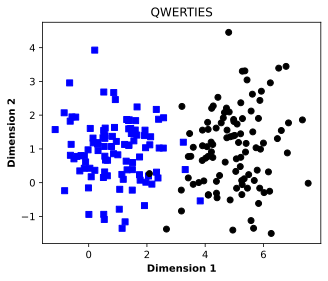

In [5]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[np.where(labels == 0)[0],0],
        data[np.where(labels == 0)[0],1],'bs')

plt.plot(data[np.where(labels == 1)[0],0],
        data[np.where(labels == 1)[0],1] , 'ko')

plt.title("QWERTIES")
plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")

plt.show()

## 3. MODEL BUILDING

In [6]:
ANNclassify = nn.Sequential(
                            # Neuron 1
                            nn.Linear(2,1),
                            nn.ReLU(),
                            # Neuron 2
                            nn.Linear(1,1),
                            nn.Sigmoid()
                           )
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [17]:
ANNclassify222 = nn.Sequential(
                            # Input Layer Neuron 1
                            nn.Linear(2,6),
                            nn.ReLU(),
                            # Hidden Layer
                            nn.Linear(6,1),
                            nn.ReLU(),
                            # Output Layer Neuron 2
                            nn.Linear(1,1),
                            nn.Sigmoid()
                           )
ANNclassify222

Sequential(
  (0): Linear(in_features=2, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=1, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1, out_features=1, bias=True)
  (5): Sigmoid()
)

#### Before Training

In [7]:
for layer in ANNclassify.children():
    if isinstance(layer, nn.Linear):
        print("weight :",layer.state_dict()['weight'])
        print("Bias :",layer.state_dict()['bias'])

weight : tensor([[-0.3812,  0.0682]])
Bias : tensor([0.5452])
weight : tensor([[-0.1313]])
Bias : tensor([0.1080])


In [19]:
for layer in ANNclassify222.children():
    if isinstance(layer, nn.Linear):
        print("weight :",layer.state_dict()['weight'])
        print("Bias :",layer.state_dict()['bias'])
        print()

weight : tensor([[ 0.5118,  0.1028],
        [-0.6514,  0.0235],
        [-0.4942,  0.5849],
        [-0.5300, -0.0724],
        [-0.6739, -0.6613],
        [-0.6628, -0.2805]])
Bias : tensor([-0.4207, -0.6283, -0.0341,  0.5630, -0.3258, -0.2235])

weight : tensor([[-0.3053, -0.2098,  0.0334, -0.3312,  0.0538,  0.0172]])
Bias : tensor([0.1286])

weight : tensor([[0.0968]])
Bias : tensor([0.5716])



In [8]:
learningrate = 0.01

# Loss Function
lossfunc = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr = learningrate)

In [9]:
lossfunc

BCELoss()

In [10]:
lossfunc = nn.BCEWithLogitsLoss()

In [11]:
lossfunc

BCEWithLogitsLoss()

## 4. Model Training

In [12]:
epochs = 1000
losses = torch.zeros(epochs)

for epoc in range(epochs):
        
    # Forward Propagation
    y_hat = ANNclassify(data)
    
    # Compute Losses
    loss = lossfunc(y_hat , labels)
    losses[epoc] = loss
    
    # Backpropagation
    optimizer.zero_grad()  # reinitialize
    loss.backward()
    optimizer.step()

## 5. Plotting losses

In [13]:
#losses

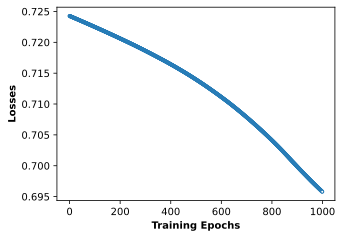

In [14]:
plt.figure(figsize = (5,3.5) , dpi = 140 )

plt.plot(losses.detach(), ".-" , markerfacecolor = "w" , linewidth = 0.1)

plt.xlabel("Training Epochs" , fontweight = "bold")
plt.ylabel("Losses" , fontweight = "bold")

plt.show()

## 6. Final Predictions

In [15]:
# Predictions value will lie between 0 and 1
predictions = ANNclassify(data)

predlabels = predictions >0.5

# Errors :

# Grabbing the index value of missclassified predictions
missclassified = np.where(predlabels != labels)[0]

# Accuruacy
accuracy  = (1 - (len(missclassified)/(2*nPerclust)))*100

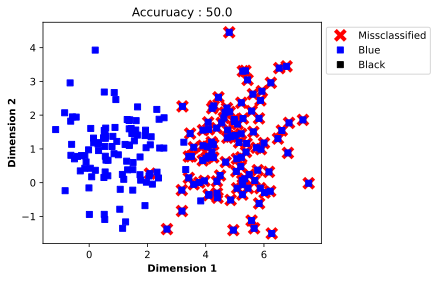

In [16]:
plt.figure(figsize = (5,4) , dpi = 130)

plt.plot(data[missclassified ,0] ,data[missclassified ,1] , 
        "rx" , markersize = 10 , markeredgewidth = 4)

plt.plot(data[np.where(~predlabels)[0],0],
        data[np.where(~predlabels)[0],1] , "bs")

plt.plot(data[np.where(predlabels)[0],0],
        data[np.where(predlabels)[0],1] , "ks")

plt.legend(["Missclassified" , "Blue" , "Black"] , bbox_to_anchor = (1,1))
plt.title(f"Accuruacy : {accuracy}")

plt.xlabel("Dimension 1" , fontweight = "bold")
plt.ylabel("Dimension 2" , fontweight = "bold")
plt.show()